# Handwriting Real 
# Handwriting Real 

In [1]:
# Unsere Klassen
#import handwriting.load_data as load_data
import handwriting.load_transfer_data as load_transfer_data
import handwriting.testing_models as testing_models # Use: build_model9v3(img_width, img_height, char) 
import utils.configs as cfg
#Imports
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import numpy as np
import pathlib
import random
import time
import os

0_0
0_1
0_10
0_18
0_5
0_7
10_1
10_8
11_18
11_2
11_20
12_22
12_5
12_7
13_17
13_4
13_5
14_18
14_2
14_20
15_17
15_2
15_4
16_3
16_5
16_7
17_16
17_21
17_9
18_18
18_2
18_4
19_2
19_20
19_8
1_11
1_13
1_16
1_4
1_9
20_12
20_21
20_5
21_14
21_21
21_4
22_15
22_20
22_22
22_3
23_5
23_9
24_3
24_5
25_0
25_1
25_18
25_21
25_5
26_20
26_21
26_3
26_5
27_14
27_17
27_21
28_20
28_9
29_17
29_3
2_1
2_12
2_16
2_18
2_20
30_2
30_6
30_7
31_10
31_13
31_17
31_6
31_8
32_16
32_18
32_3
32_7
32_9
33_13
33_16
33_18
33_21
33_8
34_2
34_6
35_18
35_5
36_3
36_9
37_11
37_6
37_8
38_17
38_20
38_21
39_10
39_13
39_15
39_16
39_17
39_19
39_3
39_5
39_7
39_8
3_11
3_12
3_15
3_19
3_6
40_0
40_11
40_17
40_20
40_9
41_0
41_21
41_5
42_11
42_14
42_16
42_2
42_22
42_3
42_4
42_5
43_12
43_13
43_15
43_19
43_2
43_21
43_22
43_6
44_16
44_19
44_21
44_8
45_10
45_12
45_18
45_7
46_17
46_21
46_22
47_13
47_14
47_18
47_21
48_0
48_14
49_12
49_15
49_17
49_4
49_8
4_10
4_15
4_16
4_19
4_22
4_6
50_12
50_5
51_12
51_14
51_17
52_17
52_2
52_6
53_1
53_11
53_18
53_22
54_

## Config

In [2]:
config_path = "../utils/configs.json"

config = cfg.Config(config_path)

# Pipeline
TRANSFER = bool(config.get_pipeline_parameter()["transfer"])

# Model Parameter
MODEL_SAVE = bool(config.get_model_parameter()["save"])
MODEL_NAME = config.get_model_parameter()["name"]
IMAGE_WIDTH = config.get_model_parameter()["width"] # default: 1024
IMAGE_HEIGHT = config.get_model_parameter()["height"] # default: 128

# Directory Parameter
MODEL_DIR_NAME = pathlib.Path(os.getcwd()).joinpath(config.get_directory_parameter()["model_dir"])
TEST_RESULT_DIR_NAME = pathlib.Path(os.getcwd()).joinpath(config.get_directory_parameter()["test_dir"])
DATA_BASE_PATH = config.get_directory_parameter()["data_base_path"]

# Training Parameter
SAVE_HISTORY = bool(config.get_training_parameter()["save_history"])
EPOCHS = config.get_training_parameter()["epochs"]
BATCH_SIZE = config.get_training_parameter()["batch_size"] # default: 32 - 48
TF_SEED = config.get_training_parameter()["tf_seed"] # default: 42
LEARNING_RATE = config.get_training_parameter()["learning_rate"]
PATIENCE = config.get_training_parameter()["patience"] # default: 3

## Load Data

In [3]:
# Default: seed = 42
# np.random.seed(TF_SEED)
# tf.random.set_seed(TF_SEED)

# Random
#seed = random.randint(1, 1000)
#np.random.seed(seed)
#tf.random.set_seed(seed)


In [4]:
#load_data.print_samples(DATA_BASE_PATH)
if False: # IAM Dataset
    x_train_img_paths, y_train_labels = load_data.get_train_data()
    x_val_img_paths, y_val_labels = load_data.get_validation_data()
    #x_test_img_paths, y_test_labels = load_data.get_test_data()
else:
    x_train_img_paths, y_train_labels = load_transfer_data.get_train_data()
    x_val_img_paths, y_val_labels = load_transfer_data.get_validation_data()

In [5]:
print(f"Training path: {x_train_img_paths[0:2]}", y_train_labels[0:2])
print(f"Validation path: {x_val_img_paths[0:2]}", y_val_labels[0:2])
#print(f"Testing path: {x_test_img_paths[0:2]}", y_test_labels[0:2])

Training path: ['../data_zettel/cropped_images/0_0.jpg', '../data_zettel/cropped_images/0_1.jpg'] ['42', '21012001']
Validation path: ['../data_zettel/cropped_images/6_1.jpg', '../data_zettel/cropped_images/6_12.jpg'] ['11211010', '21111092']


## Create Dataset

In [6]:
# Has to be here because load data functions need to be called before
import handwriting.tokenizer as tokenizer
import handwriting.custom_image_generator as cgi

# takes eternity
#x_train, y_train = tokenizer.prepare_data(x_train_img_paths, y_train_labels) 
#x_test, y_test = tokenizer.prepare_data(x_test_img_paths, y_test_labels)

#train_generator = cgi.CustomImageGenerator(x_train_img_paths, y_train_labels, BATCH_SIZE, IMAGE_WIDTH, IMAGE_HEIGHT)

# train_ds = tokenizer.prepare_dataset(x_train_img_paths, y_train_labels, (IMAGE_WIDTH,IMAGE_HEIGHT),BATCH_SIZE)
# val_ds = tokenizer.prepare_dataset(x_val_img_paths, y_val_labels,(IMAGE_WIDTH,IMAGE_HEIGHT),BATCH_SIZE)
train_ds = tokenizer.prepare_augmented_dataset(x_train_img_paths, y_train_labels, BATCH_SIZE)
val_ds = tokenizer.prepare_dataset(x_val_img_paths, y_val_labels,(IMAGE_WIDTH,IMAGE_HEIGHT),BATCH_SIZE)
#test_ds = tokenizer.prepare_dataset(x_test_img_paths, y_test_labels,(IMAGE_WIDTH,IMAGE_HEIGHT),BATCH_SIZE)
#aug_train_ds = tokenizer.prepare_augmented_dataset(x_train_img_paths, y_train_labels, BATCH_SIZE)

ValueError: Cannot set an empty vocabulary, you passed [].

## Show Examples

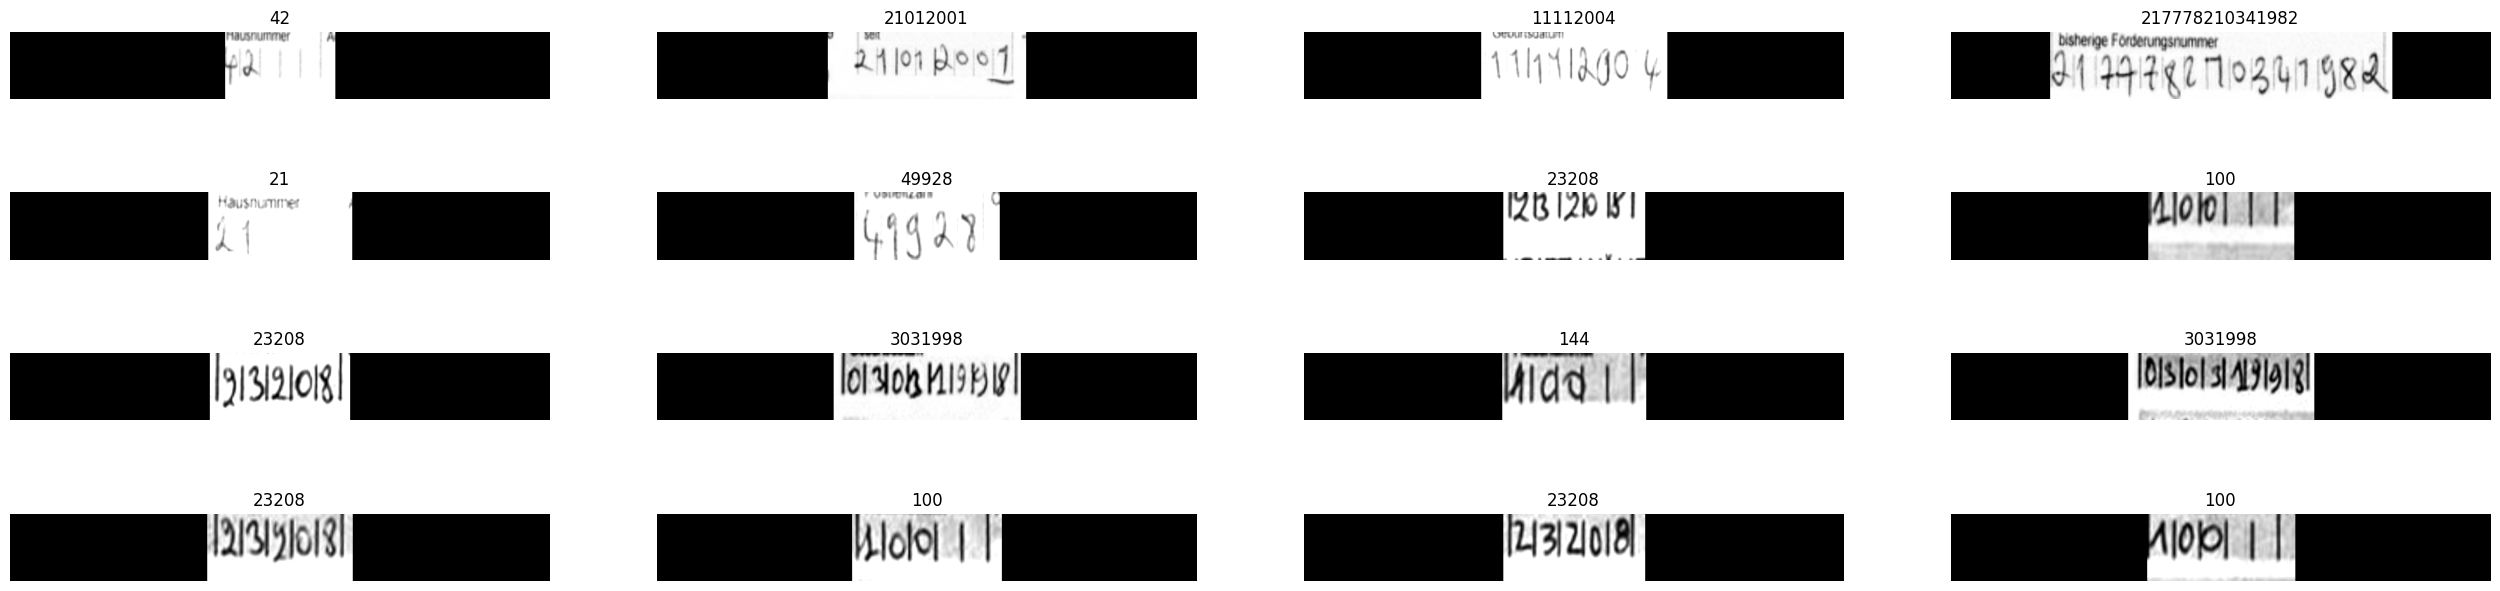

In [22]:
for data in train_ds.take(1):
    images, labels = data["image"], data["label"]

    ax = plt.subplots(4, 4, figsize=(32, 8))[1]

    for i in range(16):
        img = images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        # Gather indices where label!= padding_token.
        label = labels[i]
        indices = tf.gather(label, tf.where(tf.math.not_equal(label, tokenizer.padding_token)))
        # Convert to string.
        label = tf.strings.reduce_join(tokenizer.num_to_char(indices))
        label = label.numpy().decode("utf-8")

        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")

plt.show()  

In [23]:
print(load_transfer_data.max_len)
print(load_transfer_data.characters)
data_to_save = (load_transfer_data.max_len, load_transfer_data.characters)
import pickle
with open('saved_handwriting_model_characters.pkl', 'wb') as file:
    pickle.dump(data_to_save, file)

15
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


# Train Keras Model

In [24]:
weights_keras_string ="_weights.keras"

def model_load_weights_if_exists(model):
    MODEL_MODEL_PATH = MODEL_NAME
    MODEL_WEIGHT_PATH = MODEL_NAME + weights_keras_string
    model_path = os.path.join(MODEL_DIR_NAME, MODEL_MODEL_PATH)
    model_weight_path = os.path.join(model_path, MODEL_WEIGHT_PATH)
    print(model_path)
    if os.path.exists(model_path):
        print("Resuming Training where we left off!")
        model.load_weights(model_weight_path)

In [42]:
def train_model(model):
    #model_load_weights_if_exists(model)
        
    prediction_model = keras.models.Model(model.get_layer(name="image").input, model.get_layer(name="dense2").output)
    # checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
    early_stopping = EarlyStopping(patience=PATIENCE, restore_best_weights=True)

    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=20, min_lr=1e-9, verbose=2)
    #history = model.fit(train_ds, validation_data=val_ds, epochs=500, callbacks=[reduce_lr, early_stopping])    
    history = model.fit(train_ds, validation_data=val_ds, epochs=100)   
    return prediction_model, history

# Transfer Model

In [26]:
from keras.models import load_model
def load_model_and_weights():
    weights_keras_string = "_weights.keras"
    MODEL_MODEL_PATH = MODEL_NAME
    MODEL_WEIGHT_PATH = MODEL_NAME + weights_keras_string
    model_path = os.path.join(MODEL_DIR_NAME, MODEL_MODEL_PATH)
    model_weight_path = os.path.join(model_path, MODEL_WEIGHT_PATH)
    model_weight_path = "models/model9v3_xl/model9v3_xl_weights.keras"
    model_path = "models/model9v3_xl"
    print(model_path)
    if os.path.exists(model_path):
        print("Loading pre-trained model and weights...")
        model = load_model(model_path)
        model.load_weights(model_weight_path)
        print("Model and weights loaded successfully.")

        return model
    else:
        print("No pre-trained model or weights found.")
        return None

In [27]:
model = load_model_and_weights()
max_len = len(tokenizer.char_to_num.get_vocabulary())
characters = tokenizer.char_to_num.get_vocabulary()

models/model9v3_xl
Loading pre-trained model and weights...
Model and weights loaded successfully.


In [28]:
data_to_save = (max_len, characters)
import pickle
with open('saved_handwriting_model_characters.pkl', 'wb') as file:
    pickle.dump(data_to_save, file)

In [29]:
model = testing_models.load_and_finetune_model_dense(model, IMAGE_WIDTH, IMAGE_HEIGHT, max_len, LEARNING_RATE)

Model: "finetuned_handwriting_recognizer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 1024, 128,   0           []                               
                                1)]                                                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 1024, 128, 4  480         ['image[0][0]']                  
                                8)                                                                
                                                                                                  
 Conv2 (Conv2D)                 (None, 1024, 128, 9  41568       ['Conv1[0][0]']                  
                                6)                                 

In [43]:
train_ds = tokenizer.prepare_dataset(x_train_img_paths, y_train_labels, (IMAGE_WIDTH,IMAGE_HEIGHT),BATCH_SIZE)
val_ds = tokenizer.prepare_dataset(x_val_img_paths, y_val_labels,(IMAGE_WIDTH,IMAGE_HEIGHT),BATCH_SIZE)
# train_ds = tokenizer.prepare_augmented_dataset(x_train_img_paths, y_train_labels, BATCH_SIZE)
# val_ds = tokenizer.prepare_dataset(x_val_img_paths, y_val_labels,(IMAGE_WIDTH,IMAGE_HEIGHT),BATCH_SIZE)

In [47]:
for layer in model.layers:
    layer.trainable = True
model.summary()    

Model: "finetuned_handwriting_recognizer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 1024, 128,   0           []                               
                                1)]                                                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 1024, 128, 4  480         ['image[0][0]']                  
                                8)                                                                
                                                                                                  
 Conv2 (Conv2D)                 (None, 1024, 128, 9  41568       ['Conv1[0][0]']                  
                                6)                                 

In [48]:
start_time = time.time()

prediction_model, history = train_model(model)

total_duration = time.time() - start_time
print("Gesamte Trainingsdauer: {time}s".format(time=round(total_duration)))

Epoch 1/100
4/4 [==============================] - 1s 167ms/step - loss: 12.0322 - val_loss: 14.3069
Epoch 2/100
4/4 [==============================] - 1s 159ms/step - loss: 12.0055 - val_loss: 14.3062
Epoch 3/100
4/4 [==============================] - 1s 162ms/step - loss: 12.0347 - val_loss: 14.3061
Epoch 4/100
4/4 [==============================] - 1s 158ms/step - loss: 11.9541 - val_loss: 14.3065
Epoch 5/100
4/4 [==============================] - 1s 161ms/step - loss: 12.0917 - val_loss: 14.3052
Epoch 6/100
4/4 [==============================] - 1s 160ms/step - loss: 12.1260 - val_loss: 14.3043
Epoch 7/100
4/4 [==============================] - 1s 161ms/step - loss: 12.0083 - val_loss: 14.3038
Epoch 8/100
4/4 [==============================] - 1s 158ms/step - loss: 11.9274 - val_loss: 14.3031
Epoch 9/100
4/4 [==============================] - 1s 158ms/step - loss: 12.0531 - val_loss: 14.3026
Epoch 10/100
4/4 [==============================] - 1s 159ms/step - loss: 12.0429 - val_los

KeyboardInterrupt: 


# Plot helper functions

In [37]:
def plot_history(history, name, dir_path, save_fig):
    """
    Plottet die Historie des Trainings eines Models und speichert die in einem Verzeichnis ab 

    :param history: Das trainierte Modell
    :param name: Name, wie das Modell gespeicht werden soll
    :param name: Verzeichniss, wo der Plot gespeichert weren soll
    :return: void
    """
    metrics = history.history
    _, ax1 = plt.subplots()

    # Plot für Trainings- und Validierungsverluste
    ax1.plot(metrics['loss'], label='Training Loss', color='blue')
    ax1.plot(metrics['val_loss'], label='Validation Loss', color='red')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss', color='black')
    ax1.tick_params('y', colors='black')
    ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 0.95))  

    # Zweite Y-Achse für die Lernrate
    ax2 = ax1.twinx()
    #ax2.plot(metrics['lr'], label='Learning Rate', color='green')
    ax2.set_ylabel('Learning Rate', color='black')
    
    ax2.set_yscale('log')  # Verwende logarithmische Skala für die Lernrate
    
    ax2.tick_params('y', colors='black')
    ax2.yaxis.set_major_formatter(StrMethodFormatter('{x:1.0e}'))
    ax2.legend(loc='upper right', bbox_to_anchor=(1.0, 0.95))  
    
    if save_fig:
        plt.title('Name: '+name)
        path = os.path.join(dir_path, name + '_history.png')
        plt.savefig(path)
        
    plt.show()

In [38]:
def create_dir(path_to_dir):
    isExist = os.path.exists(path_to_dir)
    if not isExist:
        os.makedirs(path_to_dir)

In [39]:
# A utility function to decode the output of the network.
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search.
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][:, :load_transfer_data.max_len]
    # Iterate over the results and get back the text.
    output_text = []
    for res in results:
        res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
        res = tf.strings.reduce_join(tokenizer.num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text

In [40]:
def plot_evaluation(name, dir_path, save_fig):
    for batch in val_ds.take(1):
        batch_images = batch["image"]
        _, ax = plt.subplots(4, 4, figsize=(32, 8))

        preds = prediction_model.predict(batch_images)
        pred_texts = decode_batch_predictions(preds)

        for i in range(16):
            img = batch_images[i]
            img = tf.image.flip_left_right(img)
            img = tf.transpose(img, perm=[1, 0, 2])
            img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
            img = img[:, :, 0]

            title = f"Prediction: {pred_texts[i]}"
            ax[i // 4, i % 4].imshow(img, cmap="gray")
            ax[i // 4, i % 4].set_title(title)
            ax[i // 4, i % 4].axis("off")   
    if save_fig:
        path = os.path.join(dir_path, name + '_result.png')
        plt.savefig(path)
        
    plt.show()

# Model Testing

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


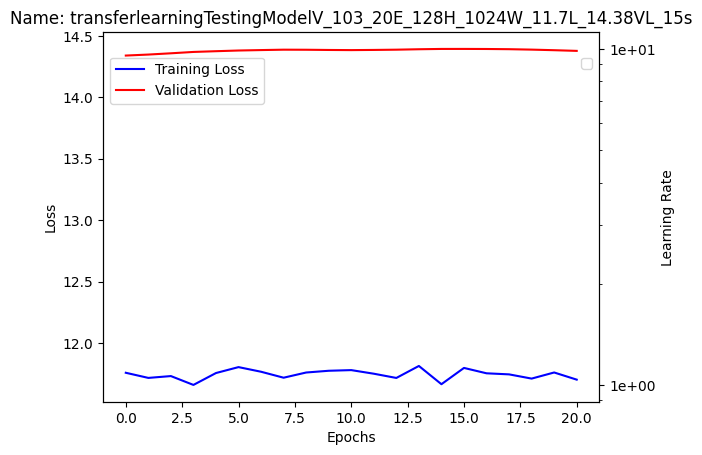

1/1 [==============================] - 1s 910ms/step


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:GPU:0}} slice index 11 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

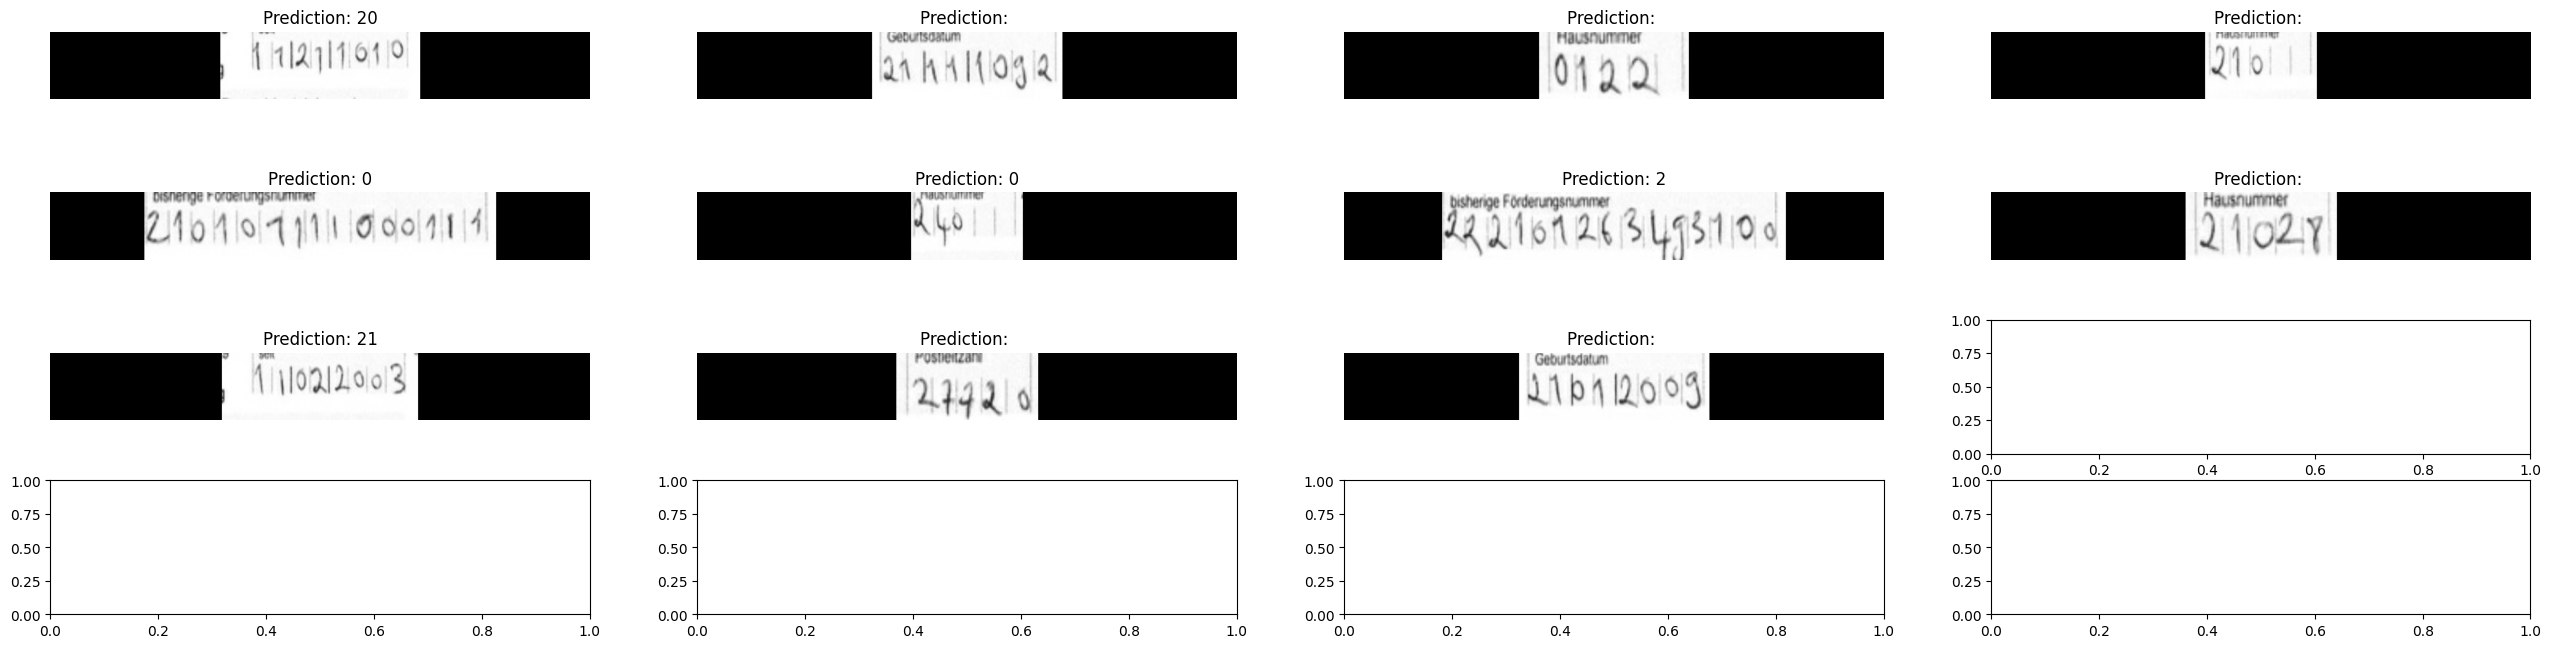

In [41]:
def create_new_plot_name(model_name, names, format):
    import re
    pattern = r"\d+"
    max_number = 0
    for name in names:
        tmp_name = name.replace(model_name,"")
        number = int(re.findall(pattern,tmp_name)[0])
        if number > max_number:
            max_number = number
            
    new_model_name = model_name + "V_" + str(max_number + 1)
    return format.replace(model_name,new_model_name)
        
if not os.path.exists(TEST_RESULT_DIR_NAME):
            create_dir(TEST_RESULT_DIR_NAME)
files_with_model_name = [file for file in os.listdir(TEST_RESULT_DIR_NAME) if MODEL_NAME in file]
metrics = history.history

NAME = "{name}_{epoch}E_{height}H_{width}W_{loss}L_{val_loss}VL_{time}s".format(
    name=MODEL_NAME, epoch=history.epoch[-1], height=IMAGE_HEIGHT, width=IMAGE_WIDTH,
    loss=round(metrics['loss'][-1],2), val_loss=round(metrics['val_loss'][-1], 2), time=round(total_duration))

if not files_with_model_name:
    if SAVE_HISTORY:
        plot_history(history, NAME, TEST_RESULT_DIR_NAME, True)
        plot_evaluation(NAME, TEST_RESULT_DIR_NAME, True)
else:
    new_name = create_new_plot_name(MODEL_NAME,files_with_model_name, NAME)
    plot_history(history, new_name, TEST_RESULT_DIR_NAME, True)
    plot_evaluation(new_name, TEST_RESULT_DIR_NAME, True)

# Save the Model

In [ ]:
if MODEL_SAVE:
    if not os.path.exists(MODEL_DIR_NAME):
        create_dir(MODEL_DIR_NAME)
    model_path = os.path.join(MODEL_DIR_NAME, "{model_name}".format(model_name=MODEL_NAME))
    model.save(model_path)
    model.save_weights(os.path.join(model_path, f"{MODEL_NAME}{weights_keras_string}"), overwrite=True, save_format=None, options=None)
    print(model_path)
    json_string = model.to_json()

    with open(os.path.join(model_path, f"{MODEL_NAME}.json"),'w') as f:
        f.write(json_string)